## About data set


This dataset named Heart.csv, contains medical information on various individuals , primarily for the purpose of analyzing and predicting for medical perspective .


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Heart.csv')   #reads the csv file i.e., loads the data into a dataframe

In [ ]:
df.shape                   # tells number of rows and columns

(918, 12)

In [9]:
df.head()     # displays first 5 rows of the dataframe

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.info()                  #gives a summary of dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


## From the info part :-

-No missing values (0 missing cells).
-Numeric columns found: Age, RestingBP, Cholesterol, FastingBS, MaxHR, Oldpeak, HeartDisease.
-Non-numeric columns: Sex, ChestPainType, RestingECG, ExerciseAngina, ST_Slope.


In [ ]:
# df['Sex'] = df['Sex'].replace({'M': 1, 'F': 0})
# df['ChestPainType'] = df['ChestPainType'].replace({'ASY': 0 , 'ATA': 1, 'NAP': 2,'TA':3 })
# df['RestingECG'] = df['RestingECG'].replace({'LVH': 0 , 'Normal': 1, 'ST': 2})
# df['ExerciseAngina'] = df['ExerciseAngina'].replace({'Y': 1 , 'N': 0})
# df['ST_Slope'] = df['ST_Slope'].replace({'Down': 0 , 'Up': 1, 'Flat': 2})


In [137]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.describe()
# gives more concise statistics about the numerical columns

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
rest =df['RestingECG'].value_counts()
chest =df['ChestPainType'].value_counts()               # gives count of unique values in the specified column
exer =df['ExerciseAngina'].value_counts()
slope =df['ST_Slope'].value_counts()
rest, chest, exer, slope

(RestingECG
 Normal    552
 LVH       188
 ST        178
 Name: count, dtype: int64,
 ChestPainType
 ASY    496
 NAP    203
 ATA    173
 TA      46
 Name: count, dtype: int64,
 ExerciseAngina
 N    547
 Y    371
 Name: count, dtype: int64,
 ST_Slope
 Flat    460
 Up      395
 Down     63
 Name: count, dtype: int64)

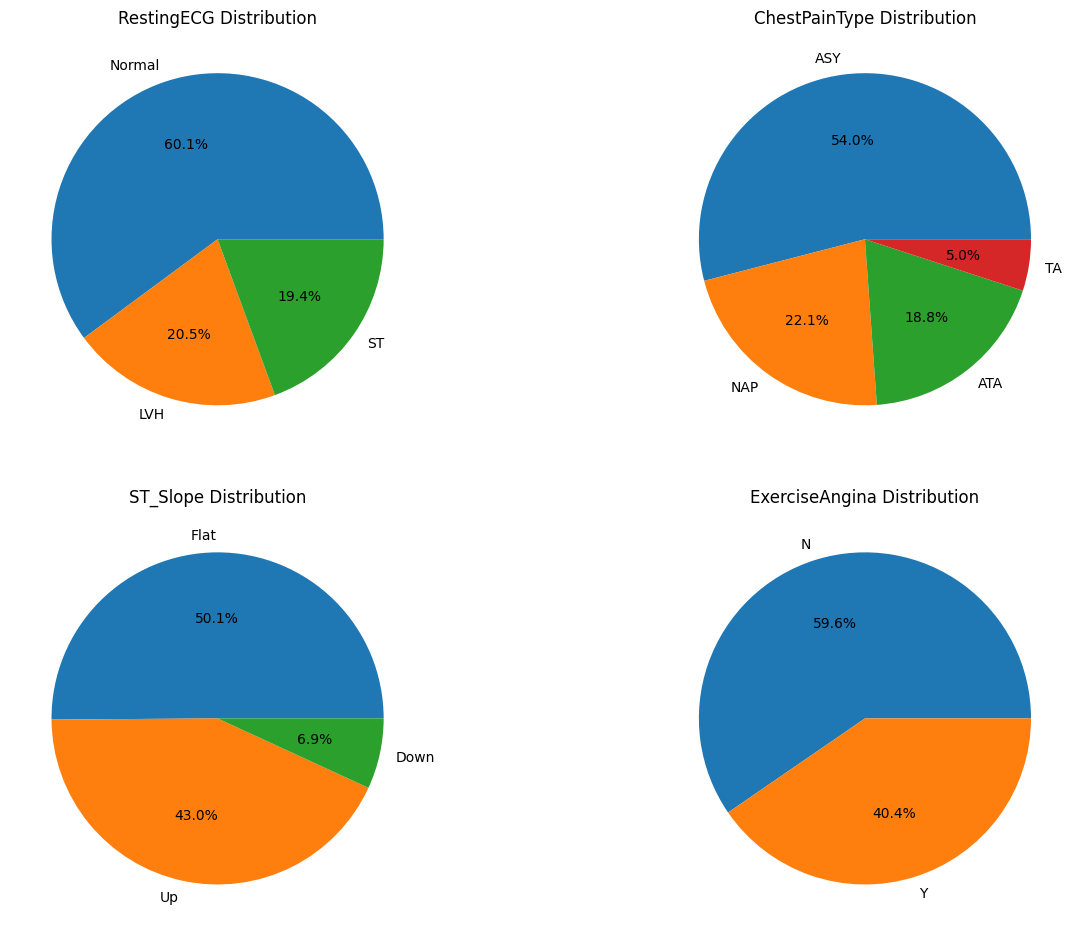

In [16]:
fig,axes = plt.subplots(2, 2, figsize=(15,10))
axes[0,0].pie(df['RestingECG'].value_counts(), labels=df['RestingECG'].value_counts().index, autopct='%1.1f%%')
axes[0,0].set_title('RestingECG Distribution')
axes[0,1].pie(df['ChestPainType'].value_counts(), labels=df['ChestPainType'].value_counts().index, autopct='%1.1f%%')
axes[0,1].set_title('ChestPainType Distribution')
axes[1,0].pie(df['ST_Slope'].value_counts(), labels=df['ST_Slope'].value_counts().index,autopct='%1.1f%%')
axes[1,0].set_title('ST_Slope Distribution')
axes[1,1].pie(df['ExerciseAngina'].value_counts(), labels=df['ExerciseAngina'].value_counts().index, autopct='%1.1f%%')
axes[1,1].set_title('ExerciseAngina Distribution')
plt.tight_layout(pad=3.0)
plt.show()

In [18]:
df.duplicated().sum()
# therefore no duplicate values also

np.int64(0)

## Outliers treatment(CHOLESTROL)

Text(0, 0.5, 'Count')

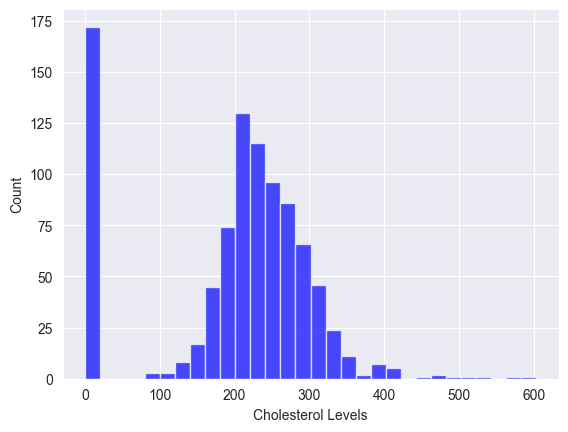

In [23]:
sns.set_style('darkgrid')
plt.hist(df.Cholesterol, bins=30, color='blue', alpha=0.7)
plt.xlabel('Cholesterol Levels')
plt.ylabel('Count')

In [54]:
df['Cholesterol'].median()

np.float64(223.0)

In [21]:
# Replace zeros with median value
df.loc[df['Cholesterol'] == 0, 'Cholesterol'] = df['Cholesterol'].median()

In [ ]:
df.Cholesterol.value_counts()

In [22]:
lower = 100   
upper = 400   
df['Cholesterol'] = np.clip(df['Cholesterol'], lower, upper)  # Cap values outside the range to lower and upper bounds
#applied the iQR method also but still the lower bound is very low as compared to practical values so used clipping method

Text(0, 0.5, 'Count')

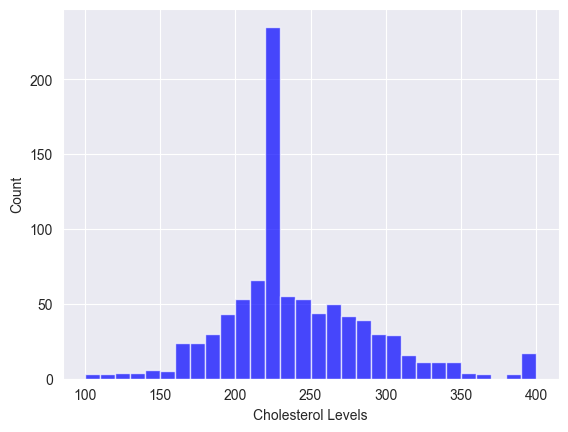

In [86]:
plt.hist(df.Cholesterol, bins=30, color='blue', alpha=0.7)
plt.xlabel('Cholesterol Levels')
plt.ylabel('Count')

## RestingBP outliers


In [ ]:
df.RestingBP.unique()

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   1.,  10.,  34.,  80.,  34., 194., 165.,  71., 153.,
         64.,  17.,  53.,  16.,   4.,  13.,   3.,   4.]),
 array([  0.        ,   6.66666667,  13.33333333,  20.        ,
         26.66666667,  33.33333333,  40.        ,  46.66666667,
         53.33333333,  60.        ,  66.66666667,  73.33333333,
         80.        ,  86.66666667,  93.33333333, 100.        ,
        106.66666667, 113.33333333, 120.        , 126.66666667,
        133.33333333, 140.        , 146.66666667, 153.33333333,
        160.        , 166.66666667, 173.33333333, 180.        ,
        186.66666667, 193.33333333, 200.        ]),
 <BarContainer object of 30 artists>)

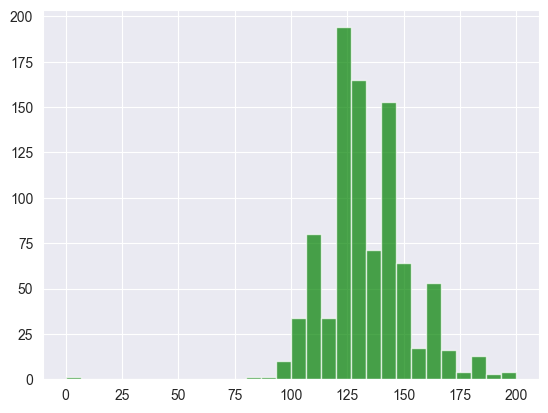

In [65]:
plt.hist(df.RestingBP, bins=30, color='green', alpha=0.7)

In [23]:
# Replace zeros with median value
df.loc[df['RestingBP'] == 0, 'RestingBP'] = df['RestingBP'].median()

In [24]:
df['RestingBP'] = np.clip(df['RestingBP'], 90, 180)  # Cap values outside the range to lower and upper bounds

Text(0, 0.5, 'Count')

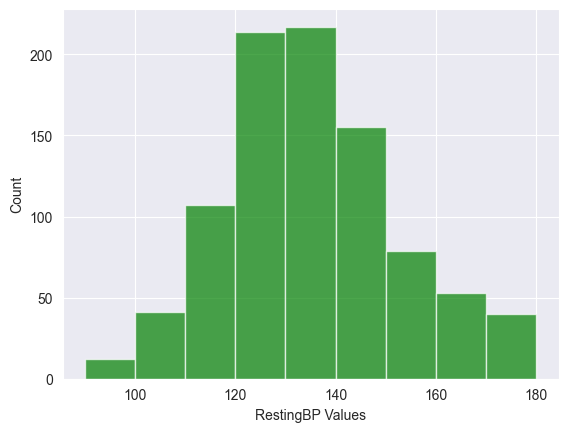

In [85]:
plt.hist(df.RestingBP, bins=[90, 100, 110, 120, 130, 140, 150, 160, 170, 180], color='green', alpha=0.7)
plt.xlabel('RestingBP Values')
plt.ylabel('Count')

### OLD peak outliers


(array([  1.,   0.,   1.,   1.,   0.,   4.,   2.,   2., 370.,  47.,  44.,
         27., 119.,  78.,  39.,  83.,   9.,  27.,   8.,  31.,   5.,   6.,
          8.,   3.,   0.,   1.,   0.,   1.,   0.,   1.]),
 array([-2.6       , -2.30666667, -2.01333333, -1.72      , -1.42666667,
        -1.13333333, -0.84      , -0.54666667, -0.25333333,  0.04      ,
         0.33333333,  0.62666667,  0.92      ,  1.21333333,  1.50666667,
         1.8       ,  2.09333333,  2.38666667,  2.68      ,  2.97333333,
         3.26666667,  3.56      ,  3.85333333,  4.14666667,  4.44      ,
         4.73333333,  5.02666667,  5.32      ,  5.61333333,  5.90666667,
         6.2       ]),
 <BarContainer object of 30 artists>)

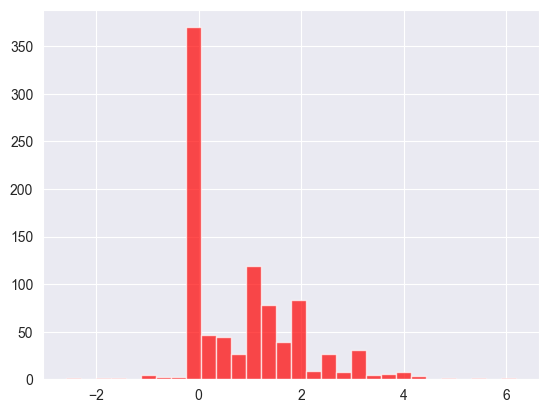

In [ ]:
plt.hist(df.Oldpeak, bins=30, color='red', alpha=0.7)
plt.xlabel('Oldpeak Values')
plt.ylabel('Count')

In [25]:
df.loc[df['Oldpeak'] < 0, 'Oldpeak'] = 0  # Replace negative values with 0

In [26]:
df['Oldpeak'] = np.clip(df['Oldpeak'], 0, 3.9)  # Cap values outside the range to lower and upper bounds

Text(0, 0.5, 'Count')

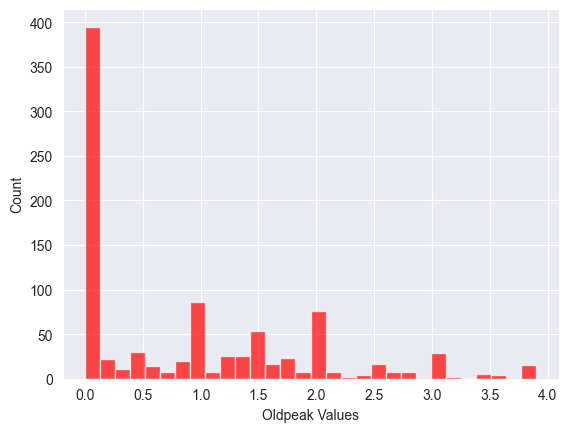

In [84]:
plt.hist(df.Oldpeak, bins=30, color='red', alpha=0.7)
plt.xlabel('Oldpeak Values')
plt.ylabel('Count')

# ----------------------------VISUAL analysis

In [111]:
df['Age'].min(), df['Age'].max()

(np.int64(28), np.int64(77))

Text(0.5, 0, 'Gender')

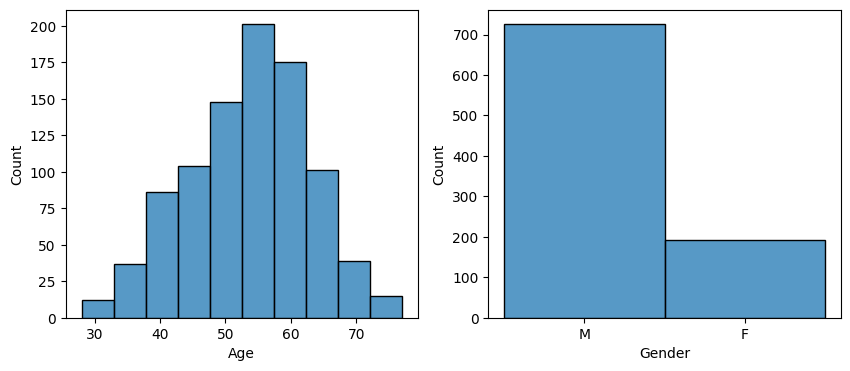

In [30]:
fig,axes = plt.subplots(1,2, figsize=(10,4))     # to create 2x2 subplots
#using axes for plotting
sns.histplot(data=df, x='Age', bins=10, ax=axes[0])
sns.histplot(data=df, x='Sex', ax=axes[1])
axes[1].set_xlabel('Gender')


From the above univariate analysis of attributes like "AGE" and "SEX":-
1)Large no. of counts is seen in age group of 50-60 yrs.
2)Similarly in gender plot , a heavy distribution is seen in male section 


### -------- Heart disease distribution with various categorial features


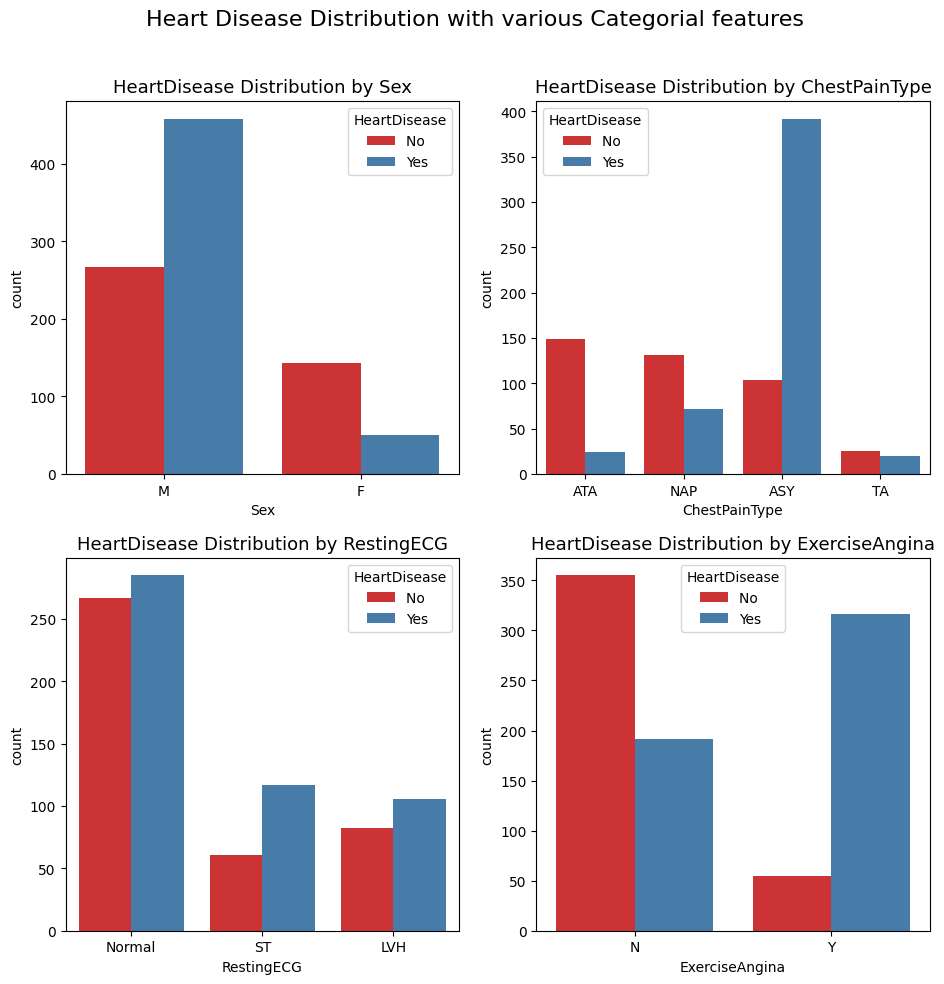

In [31]:
fig,axes = plt.subplots(2,2, figsize=(10,10))
plt.suptitle('Heart Disease Distribution with various Categorial features', fontsize=16)

   # to create 2x2 subplots
#using axes for plotting
axes[0,0].set_title(f"HeartDisease Distribution by Sex", fontsize=13)
sns.countplot(data=df, x='Sex', hue="HeartDisease", palette="Set1", ax=axes[0,0])
axes[0,0].legend(title="HeartDisease", labels=["No ", "Yes "])

plt.tight_layout(pad=2.5)

axes[0,1].set_title(f"HeartDisease Distribution by ChestPainType", fontsize=13)
sns.countplot(data=df, x='ChestPainType', hue="HeartDisease", palette="Set1", ax=axes[0,1])
axes[0,1].legend(title="HeartDisease", labels=["No ", "Yes "])


axes[1,0].set_title(f"HeartDisease Distribution by RestingECG", fontsize=13)
sns.countplot(data=df, x='RestingECG', hue="HeartDisease", palette="Set1", ax=axes[1,0])
axes[1,0].legend(title="HeartDisease", labels=["No ", "Yes "])


axes[1,1].set_title(f"HeartDisease Distribution by ExerciseAngina", fontsize=13)
sns.countplot(data=df, x='ExerciseAngina', hue="HeartDisease", palette="Set1", ax=axes[1,1])
axes[1,1].legend(title="HeartDisease", labels=["No ", "Yes "])







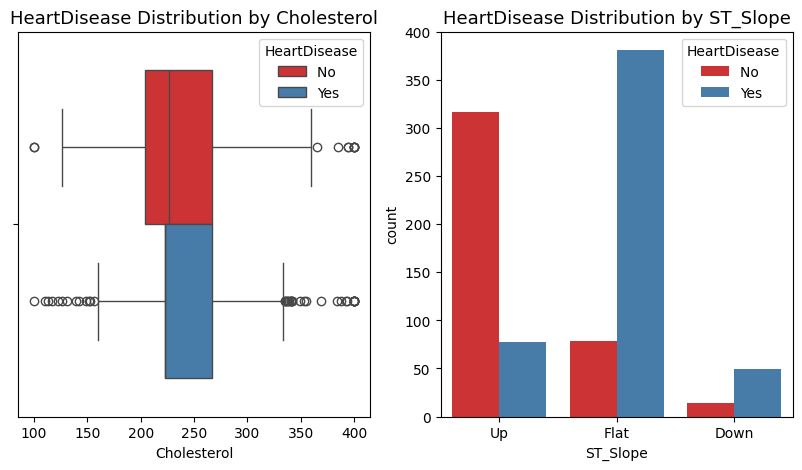

In [46]:
fig,axes = plt.subplots(1,2, figsize=(10,5))


axes[0].set_title(f"HeartDisease Distribution by Cholesterol", fontsize=13)
sns.boxplot(data=df, x='Cholesterol', hue="HeartDisease", palette="Set1", ax=axes[0])
axes[0].legend(title="HeartDisease", labels=["No ", "Yes "])

axes[1].set_title(f"HeartDisease Distribution by ST_Slope", fontsize=13)
sns.countplot(data=df, x='ST_Slope', hue="HeartDisease", palette="Set1", ax=axes[1])
axes[1].legend(title="HeartDisease", labels=["No ", "Yes "])


#### ------   analysis through Heart Data:-
Sex  :	Males often have higher heart disease rates...................................
ChestPainType :	“ASY” (asymptomatic) has highest risk..............................
ExerciseAngina :	“Y” strongly linked to heart disease..........................
RestingECG	: As there is higher no. of heart patient in normal condition but the proportion is balance enough unlike ST where among 100 , 50 are heart patient..............................
ST_Slope : there is a high riskk with flat one.............................
but with cholesterol ,it does not show much variation (with median value being around for 240-250 for both)

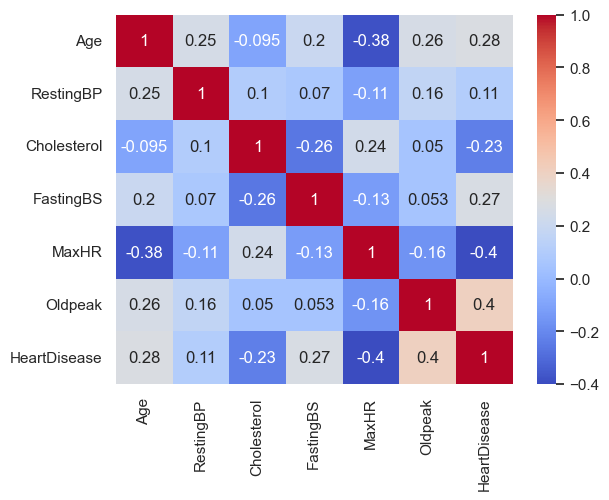

In [162]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

## other visual representation

<Axes: xlabel='Age', ylabel='Cholesterol'>

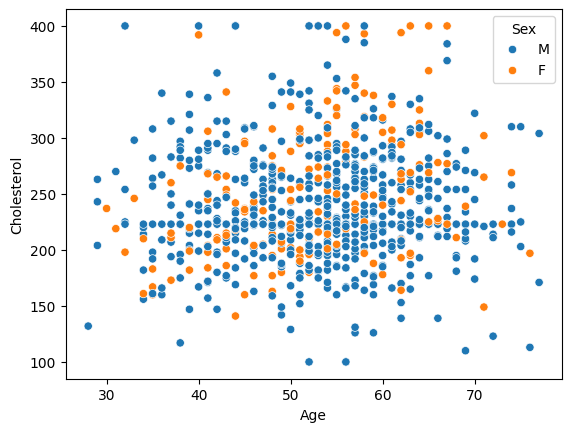

In [13]:
sns.scatterplot(x=df['Age'], y=df['Cholesterol'], hue=df['Sex']) 